In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
import joblib
import matplotlib.pyplot as plt
from keras.layers import SimpleRNN, Bidirectional, BatchNormalization
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

In [75]:
df_1 = pd.read_csv('dataset/sensor_data_badr.csv')
df_2 = pd.read_csv('dataset/sensor_data_kamal.csv')
df_3 = pd.read_csv('dataset/sensor_data_ismail.csv')
# Concatenate the three dataframes
df = pd.concat([df_1, df_2, df_3], ignore_index=True)

In [76]:
# number of rows and columns
print(df.shape)

(1690, 441)


In [77]:
# Convert all feature columns to numeric and set non-convertible values to NaN
for col in df.columns[:-1]:  # Excluding the last column
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [78]:
# Removing rows with NaN values
df.dropna(inplace=True)

In [79]:
# Separate features and labels
X = df.iloc[:, :-1].values  # All columns except the last one
y = df.iloc[:, -1].values   # Only the last column

In [80]:
# Scale the features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [81]:
# Reshape X to fit the RNN model (samples, time steps, features)
X = X.reshape((X.shape[0], 1, X.shape[1]))

In [82]:
# Encode the labels
encoder = OneHotEncoder(sparse=False)
y_encoded = encoder.fit_transform(y.reshape(-1, 1))

c:\Users\mouad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [83]:
# Define the RNN model
model_rnn = Sequential()
model_rnn.add(Bidirectional(SimpleRNN(30, activation='relu', return_sequences=True), input_shape=(X.shape[1], X.shape[2])))
model_rnn.add(BatchNormalization())
model_rnn.add(SimpleRNN(32, activation='relu'))
model_rnn.add(Dropout(0.3))
model_rnn.add(Dense(16, activation='relu'))
model_rnn.add(Dense(y_encoded.shape[1], activation='softmax'))

In [84]:
# Compile the model with categorical_crossentropy loss function
model_rnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [85]:
# Add EarlyStopping as a callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [86]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [87]:
# Train the model
history = model_rnn.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/100
43/43 [==============================] - 3s 12ms/step - loss: 1.1741 - accuracy: 0.5418 - val_loss: 1.2873 - val_accuracy: 0.4734
Epoch 2/100
43/43 [==============================] - 0s 3ms/step - loss: 0.4809 - accuracy: 0.8890 - val_loss: 0.9934 - val_accuracy: 0.6006
Epoch 3/100
43/43 [==============================] - 0s 3ms/step - loss: 0.1630 - accuracy: 0.9800 - val_loss: 0.4857 - val_accuracy: 0.7988
Epoch 4/100
43/43 [==============================] - 0s 3ms/step - loss: 0.0975 - accuracy: 0.9859 - val_loss: 0.1414 - val_accuracy: 0.9941
Epoch 5/100
43/43 [==============================] - 0s 3ms/step - loss: 0.0600 - accuracy: 0.9919 - val_loss: 0.0559 - val_accuracy: 0.9970
Epoch 6/100
43/43 [==============================] - 0s 3ms/step - loss: 0.0405 - accuracy: 0.9941 - val_loss: 0.0284 - val_accuracy: 0.9970
Epoch 7/100
43/43 [==============================] - 0s 3ms/step - loss: 0.0462 - accuracy: 0.9904 - val_loss: 0.0258 - val_accuracy: 0.9970
Epoch 8/100


In [15]:
# Save the model
model_rnn.save('rnn_model.h5')
# Save the scaler to use it in predict.py and scale the realtime data
joblib.dump(scaler, 'rnn_scaler.joblib')

c:\Users\mouad\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


['rnn_scaler.joblib']

In [88]:
# Access the loss and accuracy values
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

In [92]:
df_test = pd.read_csv('dataset/sensor_data_mouad.csv')

In [93]:
df_test.head()

,Flex-Left-1-Frame-1,Flex-Left-1-Frame-2,Flex-Left-1-Frame-3,Flex-Left-1-Frame-4,Flex-Left-1-Frame-5,Flex-Left-1-Frame-6,Flex-Left-1-Frame-7,Flex-Left-1-Frame-8,Flex-Left-1-Frame-9,Flex-Left-1-Frame-10,...,Orientation-X-Right-Frame-18,Orientation-Y-Right-Frame-18,Orientation-Z-Right-Frame-18,Orientation-X-Right-Frame-19,Orientation-Y-Right-Frame-19,Orientation-Z-Right-Frame-19,Orientation-X-Right-Frame-20,Orientation-Y-Right-Frame-20,Orientation-Z-Right-Frame-20,SIGN
0,168,163,160,146,169,172,185,198,210,218,...,0.67,-1.16,0.18,0.70,-1.12,0.16,0.68,-1.08,0.19,THANK YOU
1,178,176,179,175,179,176,176,186,205,207,...,0.63,-0.99,0.16,0.28,-0.98,0.33,0.47,-0.74,0.44,THANK YOU
2,173,172,172,178,175,184,194,201,212,212,...,0.37,-0.88,0.25,0.39,-0.82,0.47,0.65,-0.45,0.52,THANK YOU
3,179,179,176,176,175,170,186,207,211,210,...,0.39,-0.99,0.31,0.38,-0.88,0.51,0.66,-0.66,0.35,THANK YOU
4,172,172,173,172,169,169,156,149,169,179,...,0.65,-1.18,0.33,0.53,-1.05,0.35,0.30,-1.01,0.30,THANK YOU


In [94]:
df_test.dropna(inplace=True)

In [95]:
X_test_kamal = df_test.iloc[:, :-1].values
y_test_kamal = df_test.iloc[:, -1].values

In [96]:
X_test_kamal = scaler.transform(X_test_kamal)
X_test_kamal = X_test_kamal.reshape((X_test_kamal.shape[0], 1, X_test_kamal.shape[1]))

In [97]:
y_test_kamal_encoder = encoder.transform(y_test_kamal.reshape(-1, 1))

In [98]:
def predict(X, y_test):
    y_pred = model_rnn.predict(X)
    # Convert predictions to classes
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)
    # Calculate the accuracy
    accuracy = accuracy_score(y_test_classes, y_pred_classes)
    print(f"Accuracy on the test set: {accuracy * 100:.2f}%")

    # Calculate precision, recall, and F1-score
    precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
    recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
    f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')

    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")

In [99]:
predict(X_test_kamal, y_test_kamal_encoder)

19/19 [==============================] - 0s 2ms/step
Accuracy on the test set: 99.67%
Precision: 1.00
Recall: 1.00
F1-score: 1.00


In [89]:
# Make predictions on the test set
y_pred = model_rnn.predict(X_test)

11/11 [==============================] - 0s 2ms/step


In [90]:
# Convert predictions to classes
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

In [91]:
# Calculate the accuracy
accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f"Accuracy on the test set: {accuracy * 100:.2f}%")

# Calculate precision, recall, and F1-score
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Accuracy on the test set: 100.00%
Precision: 1.00
Recall: 1.00
F1-score: 1.00


In [20]:
# Confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[58  0  0  0  0  0]
 [ 0 64  0  0  0  0]
 [ 0  0 53  0  0  0]
 [ 0  0  0 62  0  0]
 [ 0  0  0  0 51  0]
 [ 0  0  0  0  0 70]]


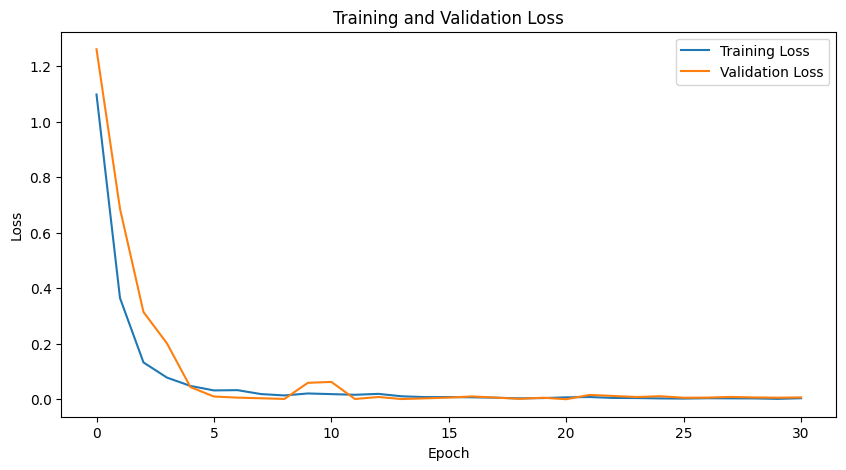

In [21]:
# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

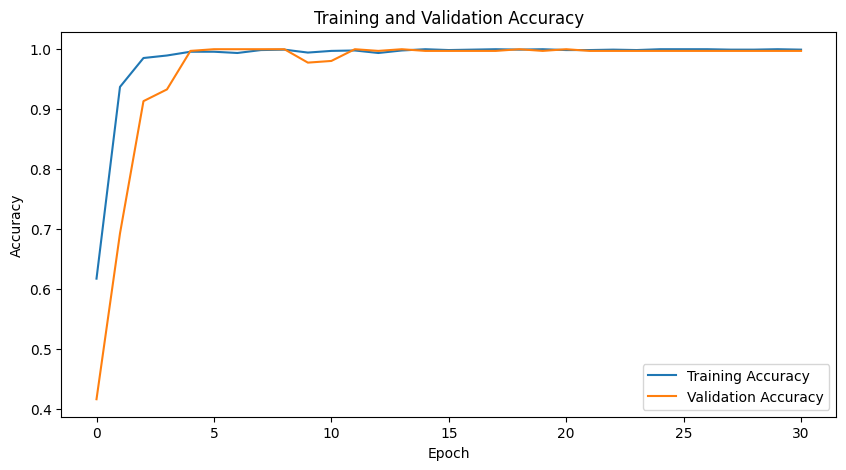

In [22]:
# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()